In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import mutual_info_score 
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the data from the CSV file
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df["Age"].describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

In [4]:
df["Income"].describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

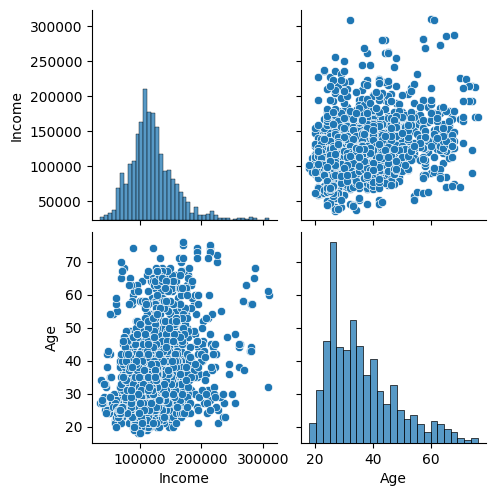

In [5]:
numerical_data = df[['Income', 'Age']]
sns.pairplot(numerical_data)

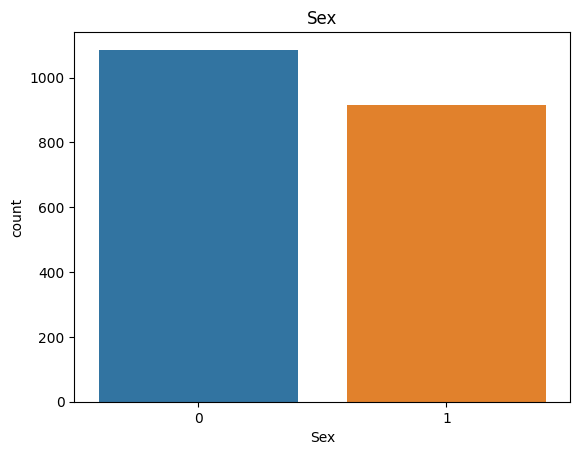

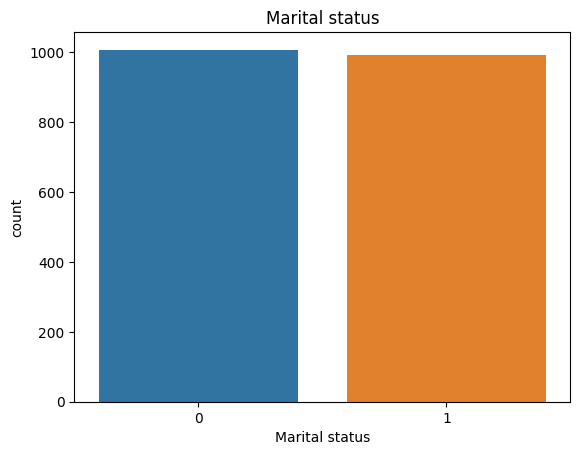

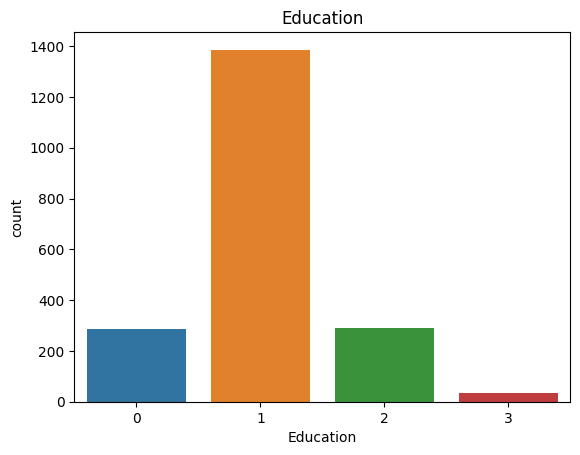

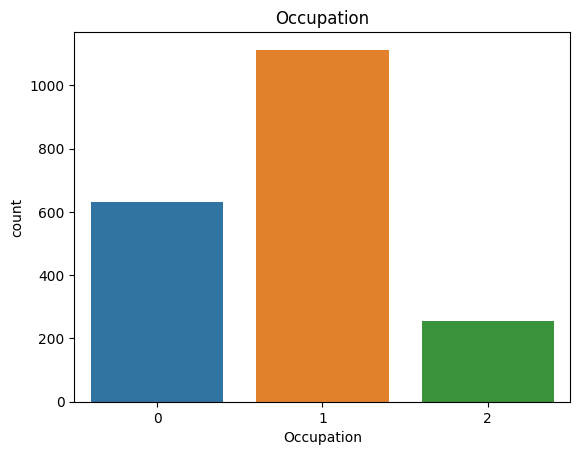

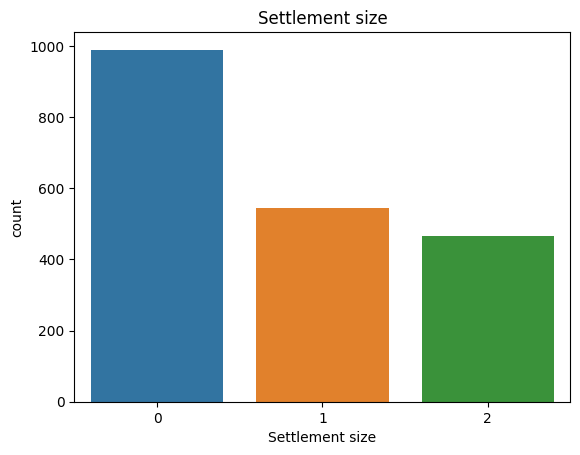

In [6]:
categorical_data = df.drop(['Income', 'Age', "ID"], axis=1)
for column in categorical_data.columns:
    sns.countplot(categorical_data, x=column).set_title(column)
    plt.show()

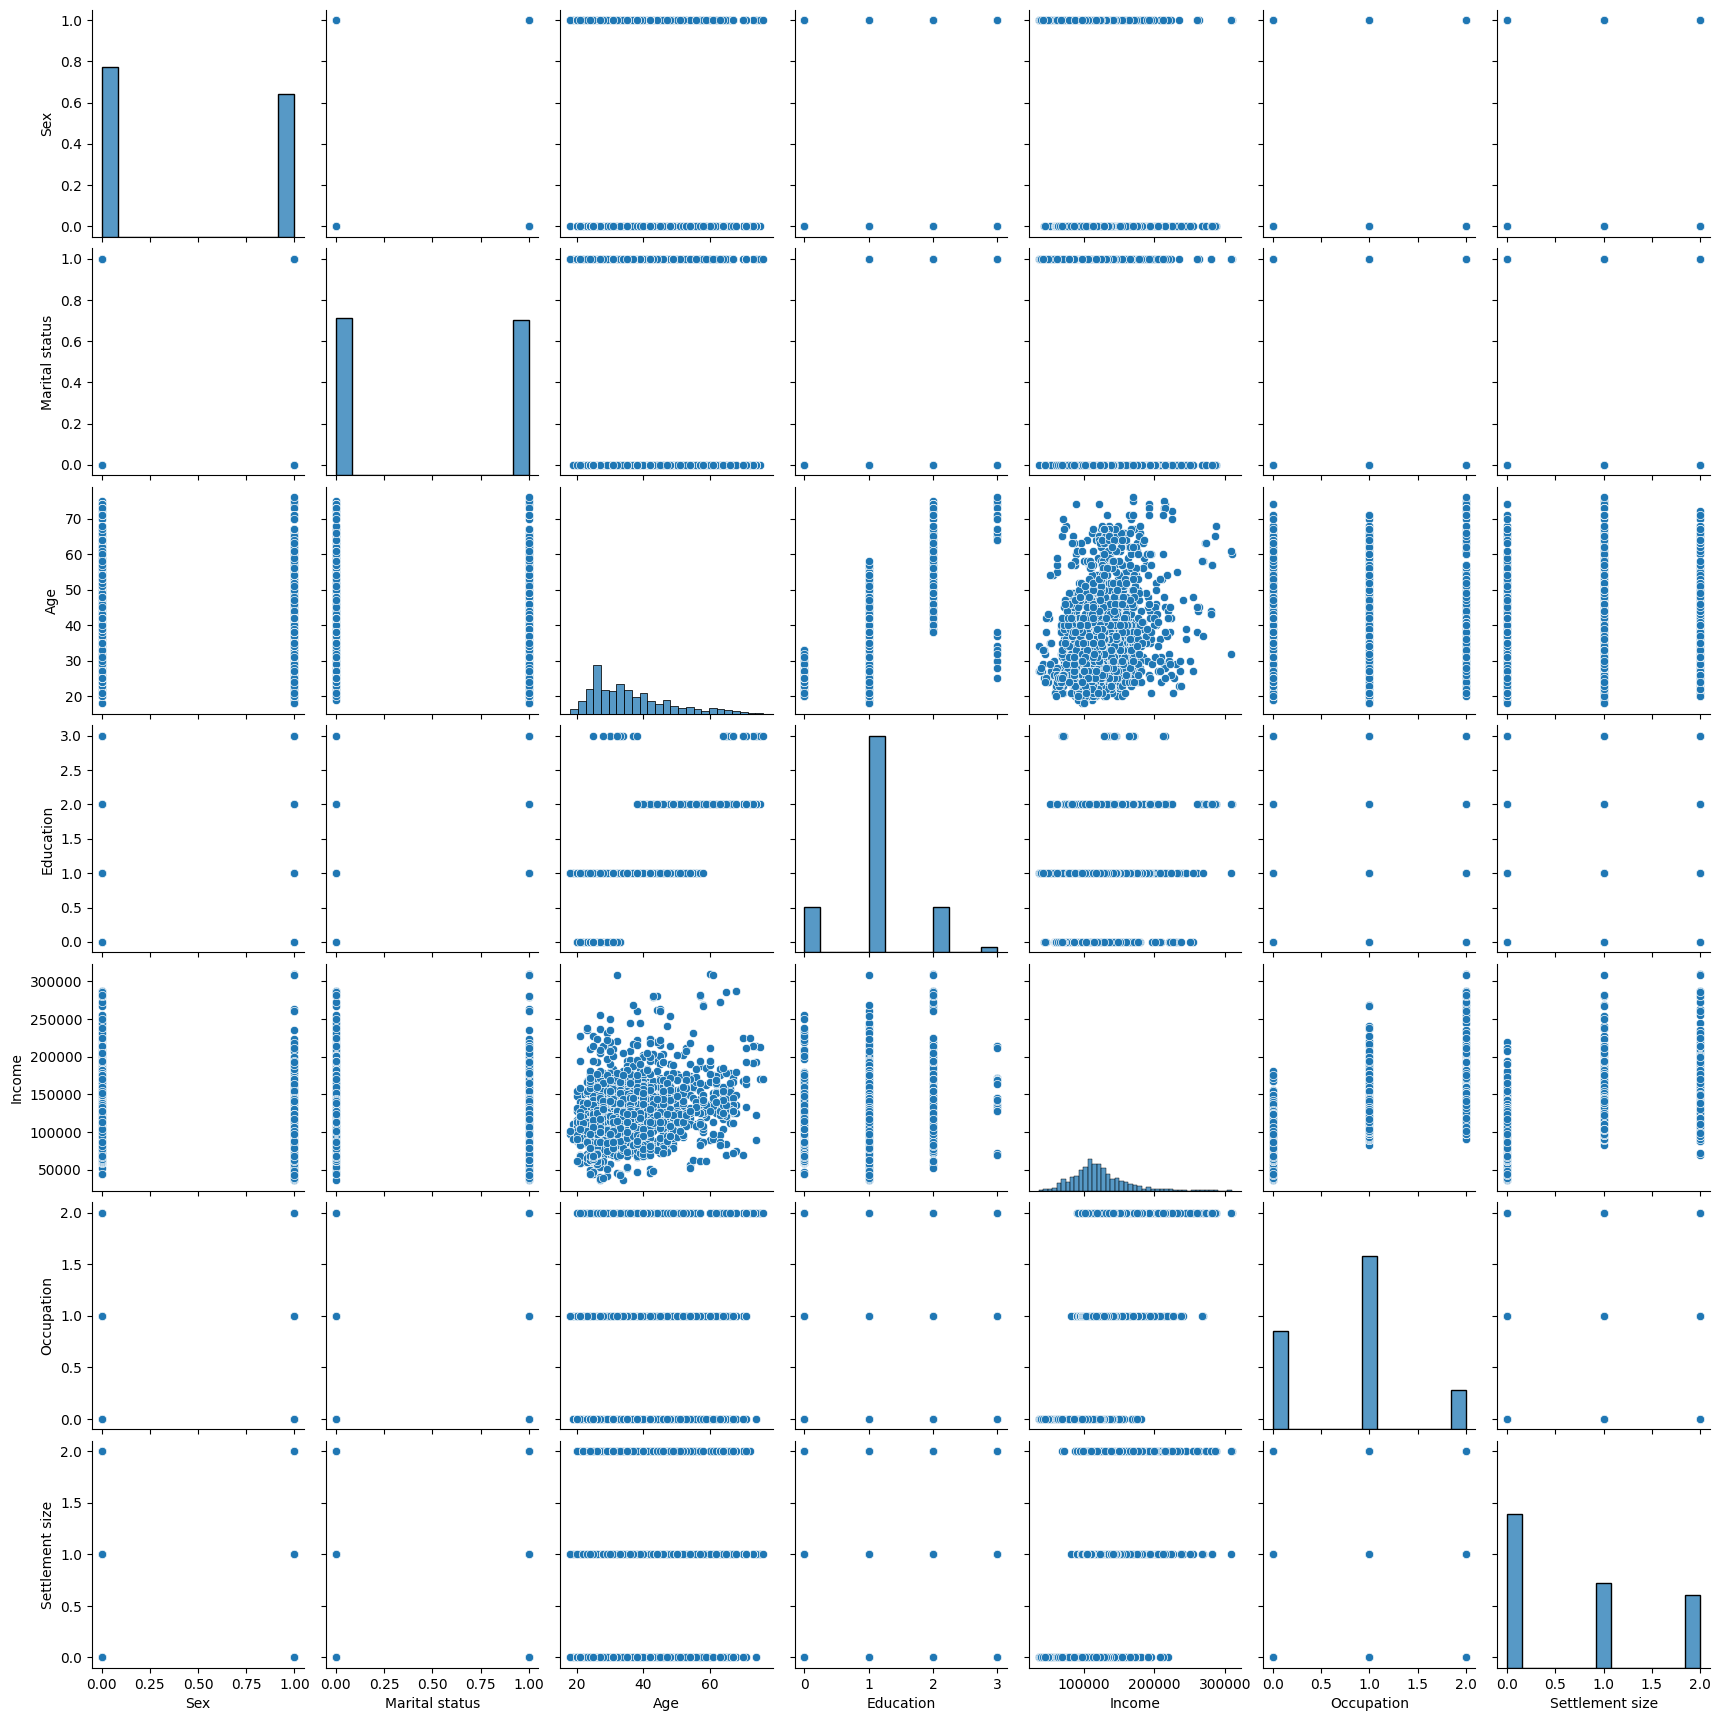

In [7]:
X = df.drop(['ID'], axis=1)
sns.pairplot(X)

In [8]:
# X_norm = normalize(X)
# X_norm = pd.DataFrame(X_norm, columns=X.columns)
scaler = StandardScaler()
normalized_numerical_data = scaler.fit_transform(numerical_data)

# Replace the original numerical columns with the normalized values
df[['Income', 'Age']] = normalized_numerical_data


Text(0.5, 1.0, 'Elbow Method')

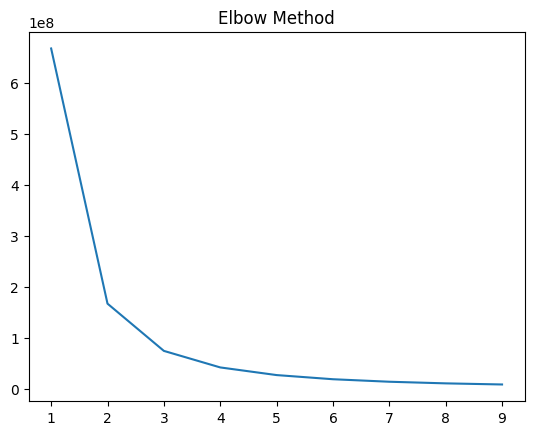

In [9]:
# To find the best value for k, we will use the elbow method
k_values = range(1, 10)
inertia_values = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df)
    inertia_values.append(model.inertia_)

sns.lineplot(x=k_values, y=inertia_values).set_title("Elbow Method")

In [13]:
# best k value is]
model = KMeans(n_clusters=2, random_state=42)
model.fit(df)
df["Cluster"] = model.labels_

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(df, model.labels_)
ss = silhouette_score(df, model.labels_) 
print(ss)

0.6263458702608528


In [12]:
dbs = davies_bouldin_score(df, model.labels_) 
print(dbs)

0.5000684690933966
